## Lets make sure we did everything right

Just test our prediction according to the given data, no transformations done whatsoever. Just make sure we are submitting a decent prediction

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

prediction = np.load('prediction.npy')
with np.load('./data/dimredux-challenge-01-data.npz') as npz:
    data_x = npz['data_x']

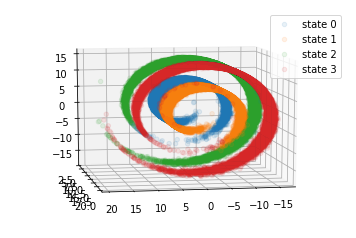

In [86]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(4):
    data = data_x[np.where(prediction == i)]
    ax.scatter(data[:,0], data[:,1], data[:,2], label='state ' + str(i), alpha=0.1)

ax.view_init(10, 80)   
plt.legend()
plt.show()

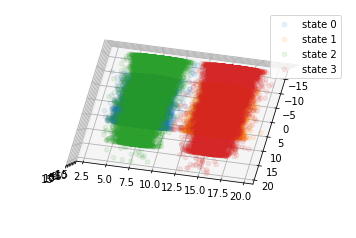

In [93]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(4):
    data = data_x[np.where(prediction == i)]
    ax.scatter(data[:,0], data[:,1], data[:,2], label='state ' + str(i), alpha=0.1)

ax.view_init(90, 10)   
plt.legend()
plt.show()

### States 1 and 3 are a bit mixed

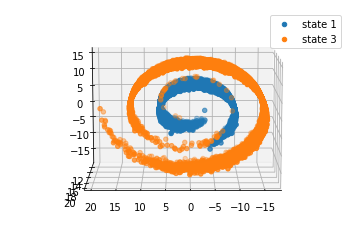

In [40]:
%matplotlib inline

state1 = data_x[np.where(prediction == 1)]
state3 = data_x[np.where(prediction == 3)]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(state1[:,0], state1[:,1], state1[:,2], label='state 1')
ax.scatter(state3[:,0], state3[:,1], state3[:,2], label='state 3')

ax.view_init(10, 90)   
plt.legend()
plt.show()

### Let's find the ones we are not sure about

Let's be generous here, we want to find the in worst case scenario lost accuracy from the mixing

[ 253  805 1373]


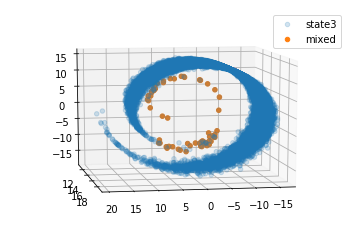

In [82]:
%matplotlib inline

idx = np.intersect1d(np.where(-11 < state3[:,2]), np.where(state3[:,2] < 8))
idx = np.intersect1d(idx, np.where(state3[:,0] < 7))
idx = np.intersect1d(idx, np.where(state3[:,0] > -10))
print(idx[:3])
mixed = state3[idx]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(state3[:, 0], state3[:, 1], state3[:, 2], label='state3', alpha=.2)
ax.scatter(mixed[:, 0], mixed[:, 1], mixed[:, 2], label='mixed', alpha=1)

ax.view_init(10, 80)
plt.legend()
plt.show()

### Probably missing accuracy from those

Well if everything else is fine, we can sure live with that 

In [83]:
print('{}% less accurate'.format(1. * len(mixed) / len(data_x)))

0.00065% less accurate
